<a href="https://colab.research.google.com/github/pujab21/EDA_DA1/blob/main/EDA_DA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Initialization

In [6]:
df = pd.read_csv('/content/insurance.csv')

##Understanding the dataset

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1337.000000,1338.000000,1338.000000
mean,39.207025,30.658657,1.094918,13270.422265
std,14.049960,6.098003,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.shape

(1338, 7)

#Transformation Techniques

##Data Deduplication

In [11]:
#To find the number of duplicates
df.duplicated().sum()

1

In [12]:
#drop the duplicate values
#keeping the first observed value
df = df.drop_duplicates(keep = "first")

In [13]:
#View the dimensions of data after dropping the duplicates
df.shape

(1337, 7)

In [14]:
#reset index after dropping duplicates
df.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


##2. Replacing Values

In [15]:
#before replacing values, we need to find the contents of the dataset for each column

In [16]:
for i in ['sex',  'smoker', 'region']:
  print(i,":", df[i].unique())

sex : ['female' 'male' '?']
smoker : ['yes' 'no' nan]
region : ['southwest' 'southeast' 'northwest' 'northeast' nan]


In [17]:
for i in ['sex',  'smoker', 'region']:
  print(i,":", df[i].value_counts())

sex : sex
male      674
female    661
?           2
Name: count, dtype: int64
smoker : smoker
no     1062
yes     274
Name: count, dtype: int64
region : region
southeast    364
southwest    324
northwest    324
northeast    324
Name: count, dtype: int64


In [18]:
#sex has "?"
#This is unknown value
#Hence replace it with np.nan
df.replace(to_replace = "?", value = np.nan, inplace = True)

In [19]:
#from df.describe
#we can understand that age,bmi, children,charges are all numeric values
#no non numeric values present
#therefore there is no need to replace non numeric values with numeric

##3. Handling Missing Value

In [20]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [21]:
df.notnull()

,age,sex,bmi,children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1333,True,True,True,True,True,True,True
1334,True,True,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


In [22]:
#finding no of NaN values per attribute
df.isnull().sum()

,0
age,0
sex,2
bmi,1
children,0
smoker,1
region,1
charges,0


In [23]:
#to find the no of non null values
df.count()

,0
age,1337
sex,1335
bmi,1336
children,1337
smoker,1336
region,1336
charges,1337


In [24]:
#finding the rows with atleast 1 NaN value
missing_df = df[df.isna().any(axis=1)]
missing_df

,age,sex,bmi,children,smoker,region,charges
12,23,male,34.40,0,no,NaN,1826.8430
38,35,NaN,36.67,1,yes,northeast,39774.2763
89,55,NaN,26.98,0,no,northwest,11082.5772
113,21,female,35.72,0,NaN,northwest,2404.7338
166,20,female,NaN,5,no,southwest,4830.6300


In [25]:
#as the max no of null values is 5 (< 0.4% of the dataset)
#i am choosing to drop the missing values
df2 = df.drop(missing_df.index)

In [26]:
#FInally checking that the df has no missing value
df2.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [27]:
df = df2

##4. Discretization and Binning

In [28]:
min_age,max_age = df.age.min(),df.age.max()
print(min_age,max_age)

18 64


In [29]:
#This is the basic Working Age Population
#It can be further divided into
#18-26 Young adults
#27-44 Adults
#45-54 Middle Age
#54-64 Seniors
#The above is for health insurance
#Thus we can create a new column age group with the above details
df2 = df.copy()
df2['Age Group'] = pd.cut(df2['age'],bins = [17, 26, 44, 54, 65],labels = ['Young adults', 'Adults', 'Middle Age', 'Seniors'])


##5. Outlier Detection and filtering


In [30]:
#plot boxplot for each outlier
def box_plot(df,col):
  plt.figure(figsize=(10, 6))
  plt.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.ylabel(f'Count of {col}')
  plt.grid(True)
  plt.show()

In [31]:
def outliers(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(len(outliers))
  return outliers.index

In [32]:
#The numeric values are
#age,bmi, children,charges

In [33]:
#age is between 18 - 64 which is valid
#therefore there are no outliers
print(df.age.unique())
print(min_age,max_age)

[19 18 28 33 32 31 46 37 60 25 62 56 27 52 23 30 34 59 63 55 22 26 24 41
 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 35 54 49 47 51 42 50 39]
18 64


In [34]:
#children is beween 0 and 5
#no outliers here either hence can be ignored
print(df.children.unique())

[0 1 3 2 5 4]


In [35]:
#for BMI
#the given data lies in range of valid range , 15.96 to 53.13
print(df.bmi.min())
print(df.bmi.max())

15.96
53.13


9


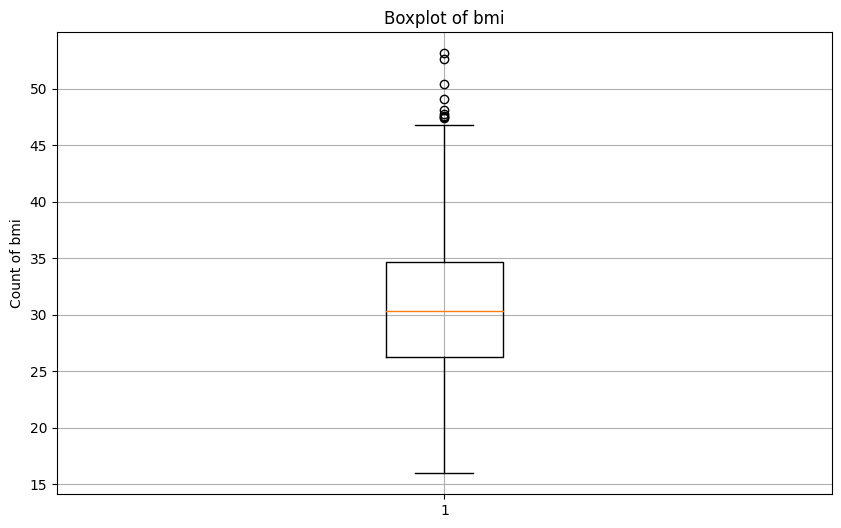

In [36]:
#boxplot for bmi
bmi_outliers = outliers(df,'bmi')
box_plot(df,'bmi')

In [37]:
#drop the outlier bmi values
df.drop(bmi_outliers, inplace = True)

137


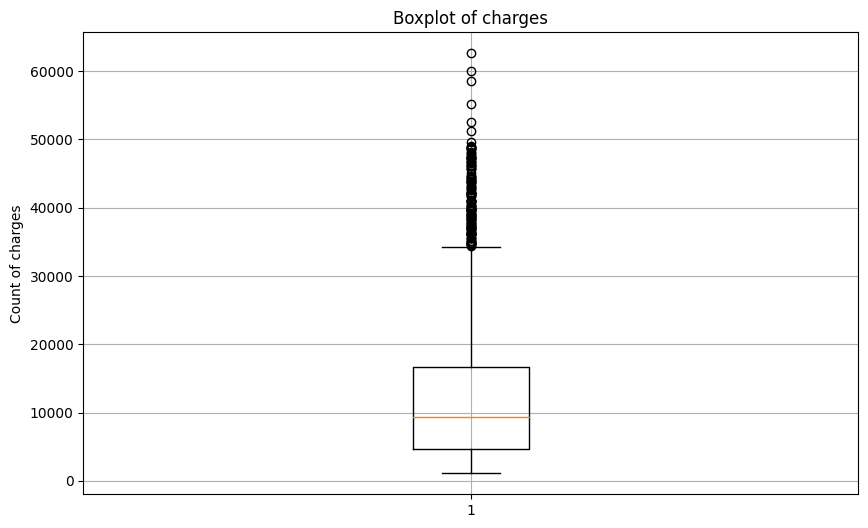

In [38]:
#for charges
#plot the boxplot
charges_outliers = outliers(df, 'charges')
box_plot(df, 'charges')

In [39]:
dfcharges = df[df['charges']> 50000]

In [40]:
dfcharges

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [41]:
#drop these outliers
df.drop(charges_outliers,inplace = True)

In [42]:
df.shape

(1186, 7)

#Univariate Analysis

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
def uni_bar_graph(col,counts):
    plt.figure(figsize=(4, 3))
    plt.bar(counts.index, counts.values, color='skyblue')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Graph of {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [45]:
def uni_pie_chart(col, counts):
    plt.figure(figsize=(8, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.axis('equal')
    plt.show()

In [46]:
def uni_box_plot(df, col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [47]:
def uni_violin_plot(df, col):
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df[col], color='skyblue')
    plt.xlabel(col)
    plt.title(f'Violin Plot of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [48]:
def uni_histogram(data, column, bins=10):

    plt.figure(figsize=(4, 3))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


##Age

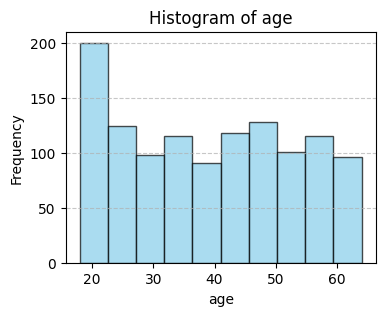

In [49]:
uni_histogram(df,'age')

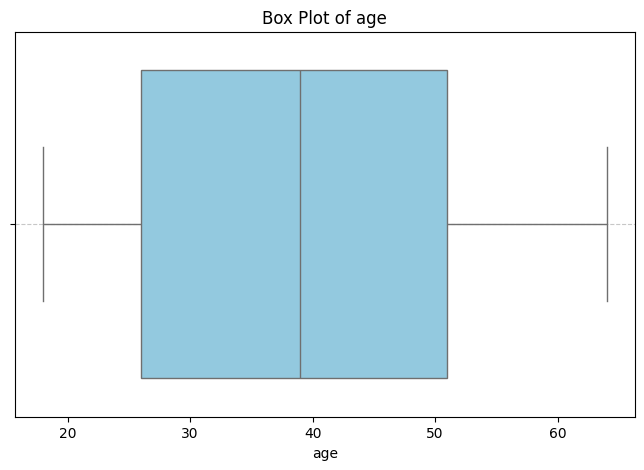

In [50]:
uni_box_plot(df,'age')

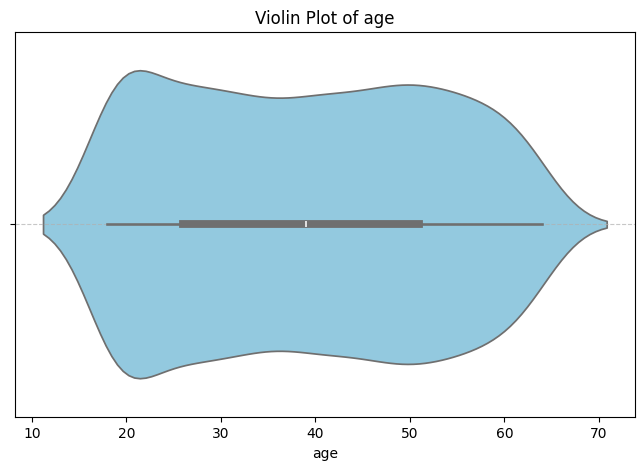

In [51]:
uni_violin_plot(df,'age')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


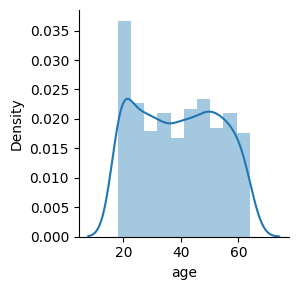

In [52]:
sns.FacetGrid(df).map(sns.distplot,"age").add_legend()

##Sex

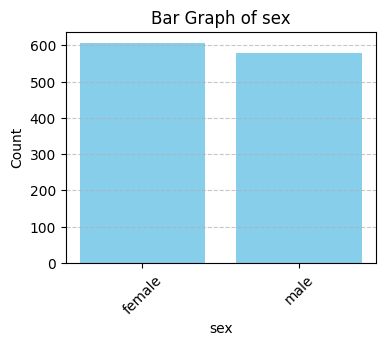

In [53]:
ct = df.sex.value_counts()
uni_bar_graph('sex',ct)

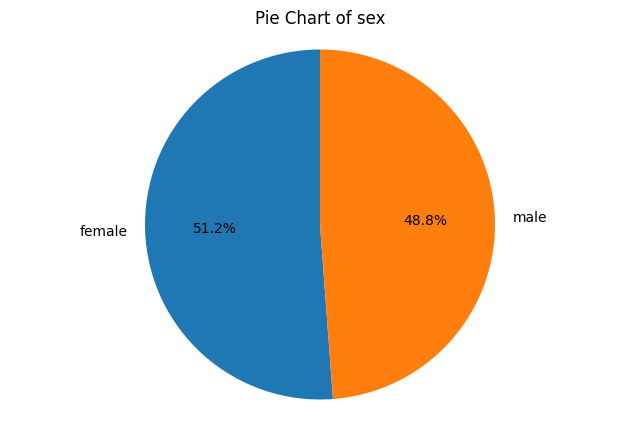

In [54]:
uni_pie_chart('sex',ct)

##BMI

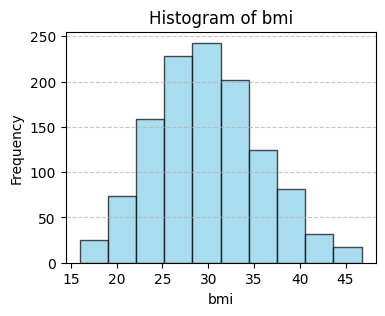

In [55]:
uni_histogram(df, 'bmi')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


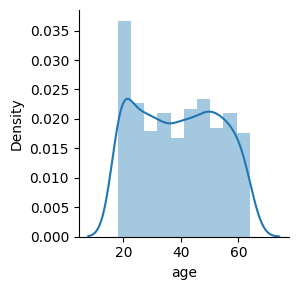

In [56]:
sns.FacetGrid(df).map(sns.distplot,"age").add_legend()

##Children

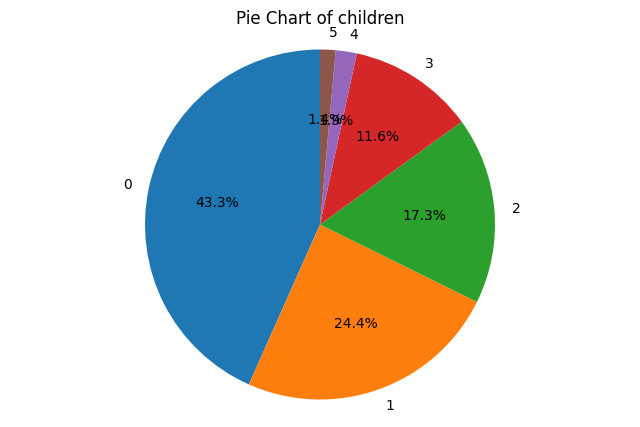

In [57]:
uni_pie_chart('children', df.children.value_counts())

##Smoker

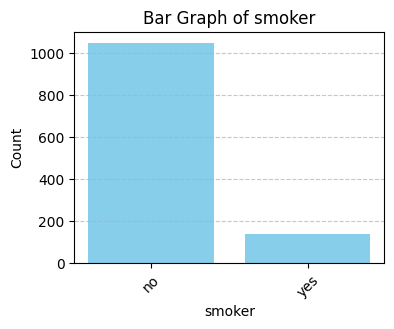

In [58]:
ct = df.smoker.value_counts()
uni_bar_graph('smoker',ct)

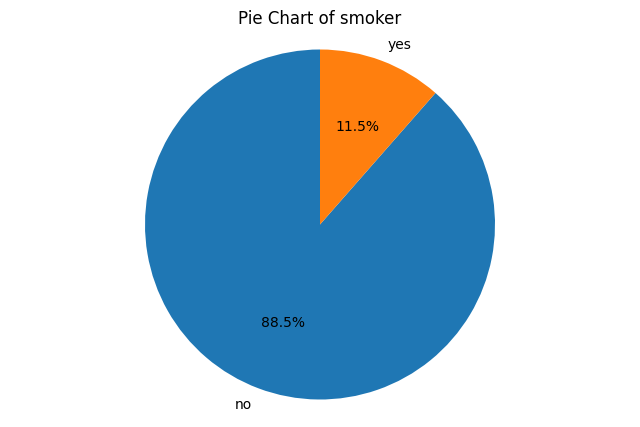

In [59]:
uni_pie_chart('smoker',ct)

##Region

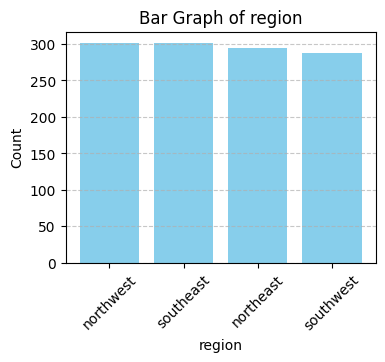

In [60]:
ct = df.region.value_counts()
uni_bar_graph('region',ct)

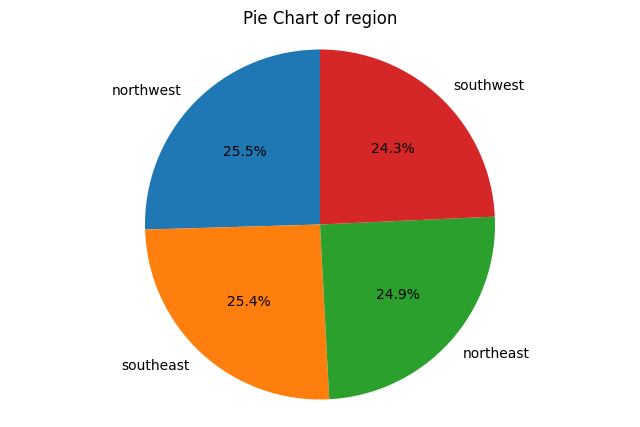

In [61]:
uni_pie_chart('region',ct)

#Bivariate Analysis

In [62]:
def scatter_plot(data, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=col1, y=col2, hue='smoker', alpha=0.7)
    plt.title(f'{col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid()
    plt.show()


In [63]:
def boxplot(data, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=col1, y=col2, palette='pastel')
    plt.title(f'{col2} by {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(axis='y')
    plt.show()


In [64]:
def violinplot(data, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=data, x=col1, y=col2, palette='pastel')
    plt.title(f'{col2} by {col1}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.grid(axis='y')
    plt.show()


In [65]:
def countplot(data, col1, col2):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col1, hue=col2, palette='pastel')
    plt.title(f'Count of {col1} by {col2}')
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.legend(title=col2)
    plt.show()


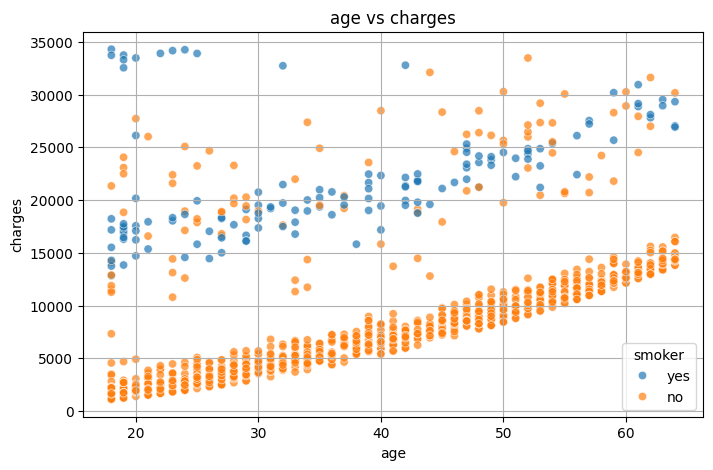

In [67]:
scatter_plot(df, 'age', 'charges')

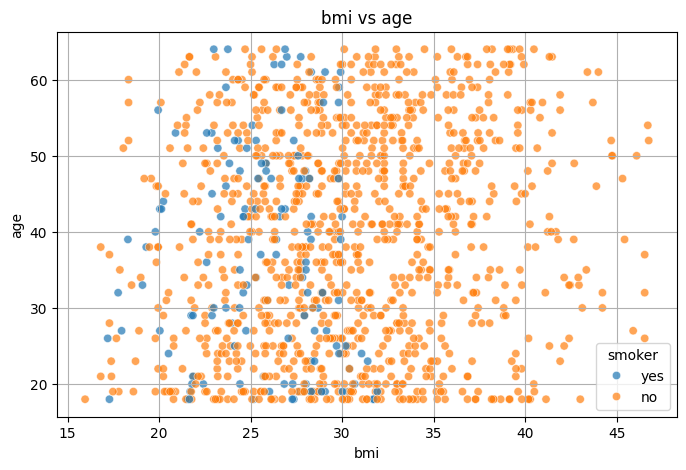

In [68]:
scatter_plot(df, 'bmi', 'age')

<ipython-input-63-cd5c905c479d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col1, y=col2, palette='pastel')


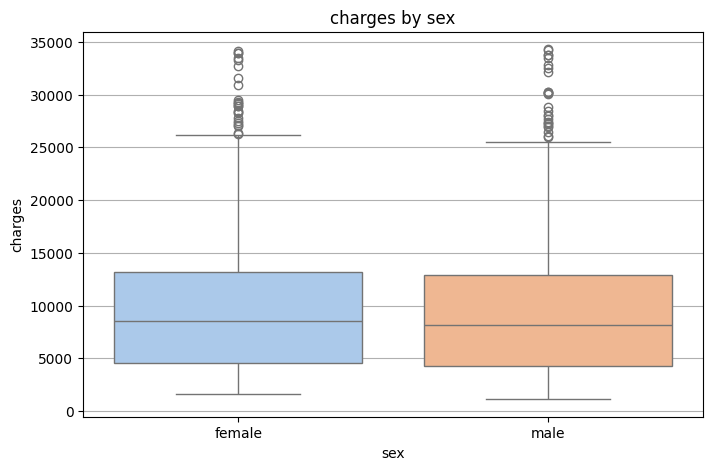

In [69]:
boxplot(df, 'sex', 'charges')

<ipython-input-64-044ad5c7c4b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=col1, y=col2, palette='pastel')


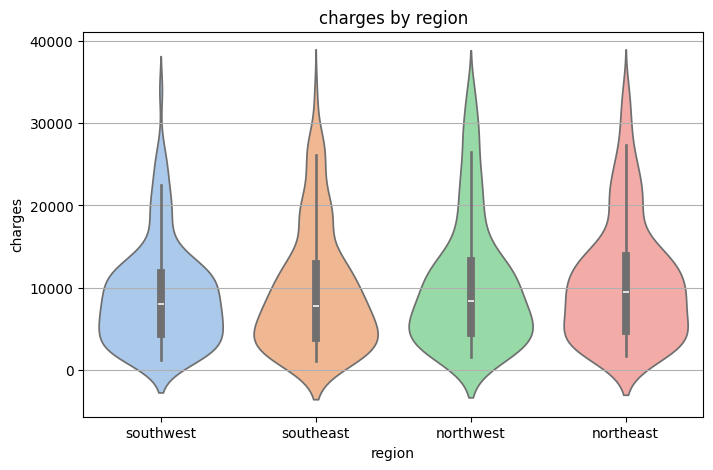

In [70]:
violinplot(df, 'region', 'charges')

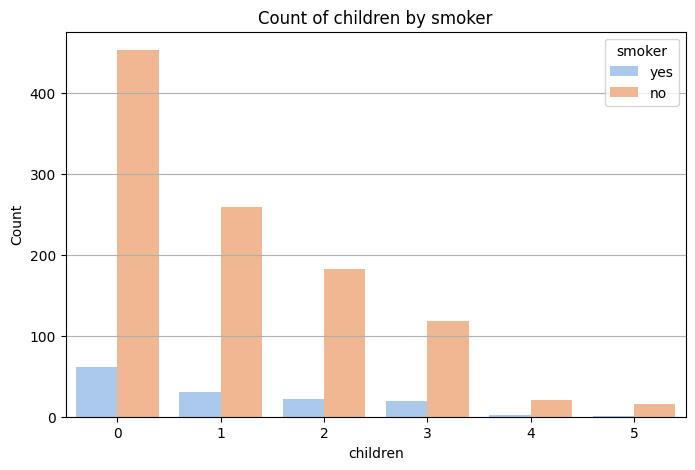

In [71]:
countplot(df, 'children', 'smoker')

#Multivariate Analysis


In [75]:
def pairplot_numerical_features(data,cols):
    sns.pairplot(data, vars=cols, hue='smoker', palette='pastel')
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.show()


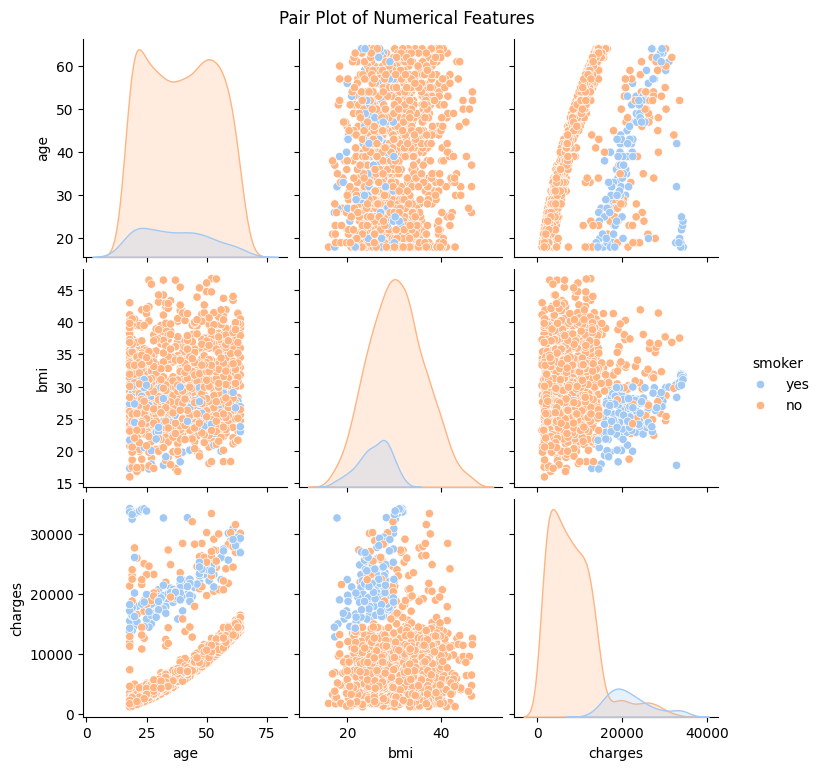

In [76]:
pairplot_numerical_features(df,['age', 'bmi', 'charges'])

In [73]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [78]:
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,age,bmi,children,charges
age,1.000000,0.128182,0.040166,0.446565
bmi,0.128182,1.000000,0.005345,-0.062230
children,0.040166,0.005345,1.000000,0.089288
charges,0.446565,-0.062230,0.089288,1.000000


<Axes: >

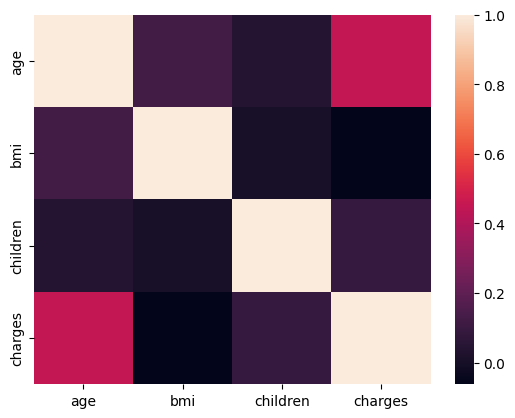

In [79]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

#Statistics

##1D Statistical Analysis

###Numeric Variable

In [81]:
def central_tendencies(df, column):
  print(f"Central Tendencies for {column}:\n")

  mean_value = np.mean(df[column])
  print(f"Mean: {mean_value}")

  median_value = np.median(df[column])
  print(f"Median: {median_value}")

  try:
    mode_value = df[column].mode()[0]
    print(f"Mode: {mode_value}")
  except IndexError:
    print("Mode: No unique mode found.")

  quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
  quantile_values = df[column].quantile(quantiles)
  print("\nQuantiles:")
  for q, value in zip(quantiles, quantile_values):
      print(f"{q * 100}%: {value}")

  print("\nQuartiles:")
  print(f"Q1 (25%): {df[column].quantile(0.25)}")
  print(f"Q2 (50%): {df[column].quantile(0.50)}")
  print(f"Q3 (75%): {df[column].quantile(0.75)}")

  print("\nDeciles:")
  for i in range(1, 10):
      print(f"D{i} ({i * 10}%): {df[column].quantile(i * 0.1)}")

In [82]:
central_tendencies(df, 'age')

Central Tendencies for age:

Mean: 39.05902192242833
Median: 39.0
Mode: 18

Quantiles:
10.0%: 19.0
25.0%: 26.0
50.0%: 39.0
75.0%: 51.0
90.0%: 58.0

Quartiles:
Q1 (25%): 26.0
Q2 (50%): 39.0
Q3 (75%): 51.0

Deciles:
D1 (10%): 19.0
D2 (20%): 24.0
D3 (30%): 29.0
D4 (40%): 34.0
D5 (50%): 39.0
D6 (60%): 44.0
D7 (70%): 49.0
D8 (80%): 53.0
D9 (90%): 58.0


In [83]:
def measures_of_dispersion(df, column):
  print(f"Measures of Dispersion for {column}:\n")

  data_range = df[column].max() - df[column].min()
  print(f"Range: {data_range}")

  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  print(f"Interquartile Range (IQR): {iqr}")

  mean_value = np.mean(df[column])
  mean_difference = np.mean(np.abs(df[column] - mean_value))
  print(f"Mean Difference: {mean_difference}")

  mean_deviation = np.mean(np.abs(df[column] - np.mean(df[column])))
  print(f"Mean Deviation: {mean_deviation}")

  std_deviation = np.std(df[column])
  print(f"Standard Deviation: {std_deviation}")

  median_deviation = np.median(np.abs(df[column] - np.median(df[column])))
  print(f"Median Deviation: {median_deviation}")

  if np.mean(df[column]) != 0:
      coefficient_of_variation = (std_deviation / np.mean(df[column])) * 100
      print(f"Coefficient of Variation: {coefficient_of_variation:.2f}%")
  else:
      print("Coefficient of Variation: Cannot be calculated as mean is 0.")

  skewness = df[column].skew()
  print(f"Skewness: {skewness}")

  kurtosis = df[column].kurt()
  print(f"Kurtosis: {kurtosis}")

In [84]:
measures_of_dispersion(df, 'charges')

Measures of Dispersion for charges:

Range: 33181.293300000005
Interquartile Range (IQR): 8543.785187500001
Mean Difference: 5583.587394671627
Mean Deviation: 5583.587394671627
Standard Deviation: 7186.748605948377
Median Deviation: 4217.776199999999
Coefficient of Variation: 72.41%
Skewness: 1.15766121216732
Kurtosis: 0.9504071527263283


In [87]:
def histogram_and_frequency_polygon(df, column):
  plt.figure(figsize=(10, 6))
  plt.hist(df[column], bins='auto', alpha=0.7, color='skyblue', edgecolor='black')
  values, bins, _ = plt.hist(df[column], bins='auto', alpha=0)
  bin_centers = (bins[:-1] + bins[1:]) / 2
  plt.plot(bin_centers, values, marker='o', linestyle='-', color='red', label='Frequency Polygon')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.title(f'Histogram and Frequency Polygon of {column}')
  plt.legend()
  plt.grid(True)
  plt.show()

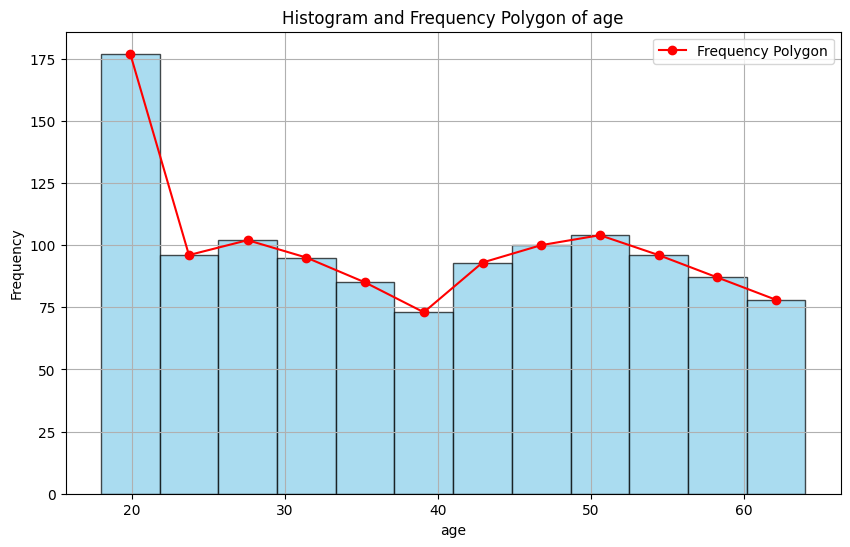

In [88]:
histogram_and_frequency_polygon(df, 'age')

In [89]:
def cumulative_frequency_distribution(df, column):
  counts = df[column].value_counts().sort_index()
  cumulative_counts = counts.cumsum()

  print(f"Cumulative Frequency Distribution for {column}:\n")
  print("{:<15} {:<15} {:<15}".format("Value", "Frequency", "Cumulative Frequency"))
  print("-" * 45)
  for value, count, cumulative_count in zip(counts.index, counts, cumulative_counts):
      print("{:<15} {:<15} {:<15}".format(value, count, cumulative_count))

In [90]:
cumulative_frequency_distribution(df, 'age')

Cumulative Frequency Distribution for age:

Value           Frequency       Cumulative Frequency
---------------------------------------------
18              64              64             
19              60              124            
20              26              150            
21              27              177            
22              23              200            
23              22              222            
24              25              247            
25              26              273            
26              27              300            
27              24              324            
28              26              350            
29              25              375            
30              23              398            
31              24              422            
32              25              447            
33              23              470            
34              23              493            
35              23              516      

In [91]:
def dispersion_box_plots(df, numerical_columns):
  for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

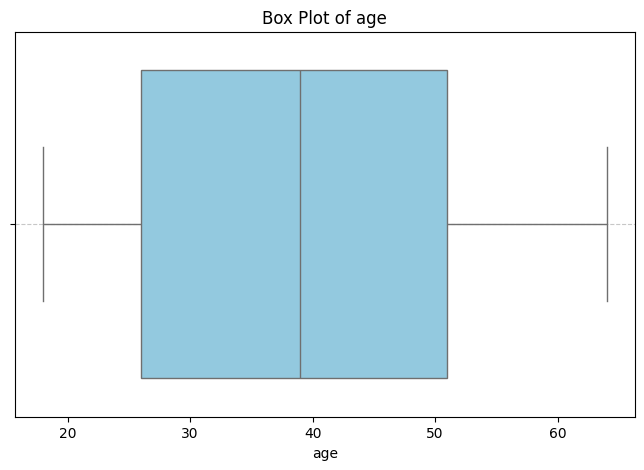

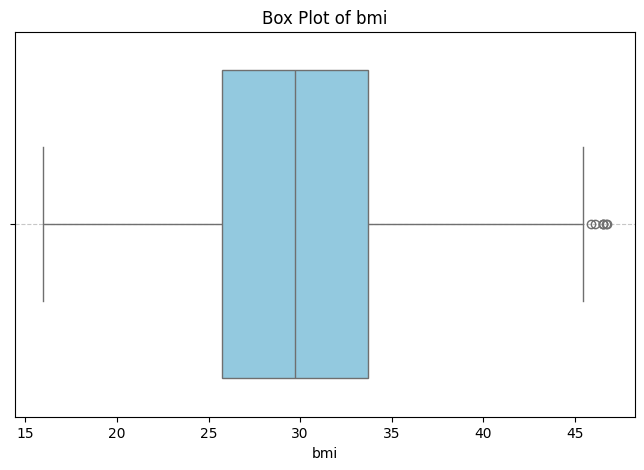

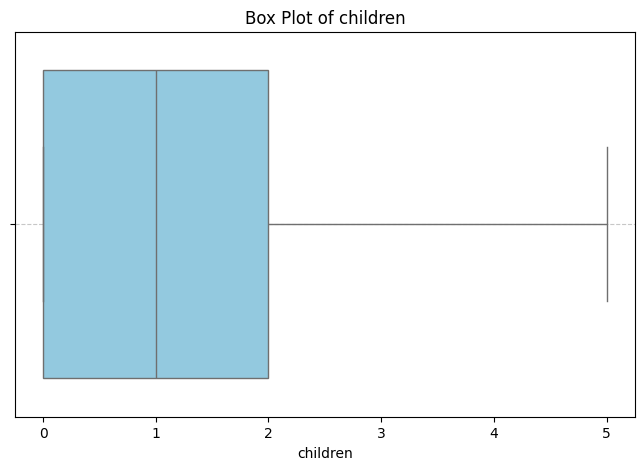

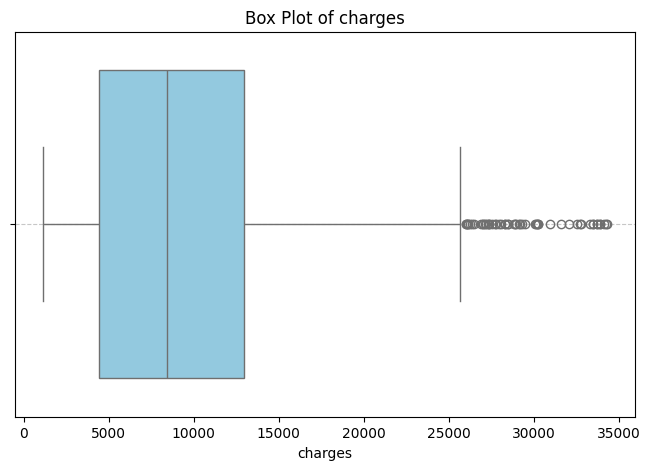

In [92]:
numerical_columns = ['age', 'bmi', 'children', 'charges']
dispersion_box_plots(df, numerical_columns)

###Categorical Variable


In [93]:
def frequency_distribution_categorical(df, column):
  counts = df[column].value_counts().sort_index()
  print(f"Frequency Distribution for {column}:\n")
  print("{:<20} {:<20}".format("Category", "Frequency"))
  print("-" * 40)
  for category, count in counts.items():
      print("{:<20} {:<20}".format(category, count))


In [94]:
frequency_distribution_categorical(df, "sex")
frequency_distribution_categorical(df, "smoker")
frequency_distribution_categorical(df, "region")

Frequency Distribution for sex:

Category             Frequency           
----------------------------------------
female               607                 
male                 579                 
Frequency Distribution for smoker:

Category             Frequency           
----------------------------------------
no                   1050                
yes                  136                 
Frequency Distribution for region:

Category             Frequency           
----------------------------------------
northeast            295                 
northwest            302                 
southeast            301                 
southwest            288                 


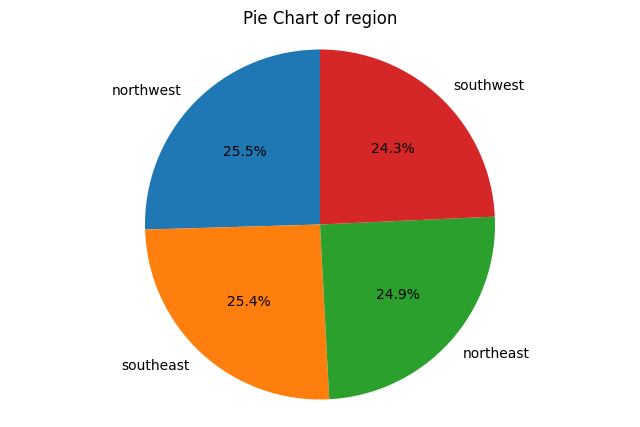

In [96]:
uni_pie_chart('region',df['region'].value_counts())

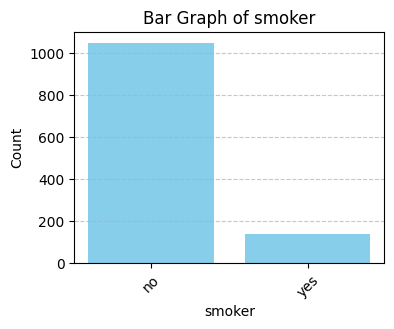

In [97]:
uni_bar_graph('smoker',df['smoker'].value_counts())

##2D Statistical Analysis

###2D Categorical Variables

In [99]:
def frequency_table_2d_categorical(df, col1, col2):
  table = pd.crosstab(df[col1], df[col2])
  return table

In [100]:
frequency_table_2d_categorical(df, 'sex', 'smoker')

smoker,no,yes
sex,,
female,540,67
male,510,69


In [101]:
def calculate_correlation(df, col1, col2):
  correlation = df[col1].corr(df[col2], method='pearson')
  return correlation

In [102]:
correlation_age_charges = calculate_correlation(df, 'age', 'charges')
print(f"Correlation between age and charges: {correlation_age_charges}")

Correlation between age and charges: 0.44656490578937114


In [104]:
def chi_square_test(df, col1, col2):
  contingency_table = pd.crosstab(df[col1], df[col2])
  chi2, p, _, _ = calculate_chi_square(contingency_table)
  dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
  return chi2, dof, p


def calculate_chi_square(contingency_table):
  n_rows, n_cols = contingency_table.shape
  total_sum = contingency_table.sum().sum()
  row_sums = contingency_table.sum(axis=1)
  col_sums = contingency_table.sum(axis=0)

  expected_values = np.zeros((n_rows, n_cols))
  for i in range(n_rows):
      for j in range(n_cols):
          expected_values[i, j] = (row_sums[i] * col_sums[j]) / total_sum

  chi2_statistic = np.sum(((contingency_table - expected_values) ** 2) / expected_values)
  p_value = 1
  return chi2_statistic, p_value, (n_rows - 1) * (n_cols - 1), expected_values


In [105]:
chi2, dof, p = chi_square_test(df, 'sex', 'smoker')
print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")

Chi-square statistic: smoker
no     0.025874
yes    0.199761
dtype: float64
Degrees of freedom: 1
P-value: 1


<ipython-input-104-2ba8afa18086>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expected_values[i, j] = (row_sums[i] * col_sums[j]) / total_sum
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


###2D Analysis of 2 quantitative variables

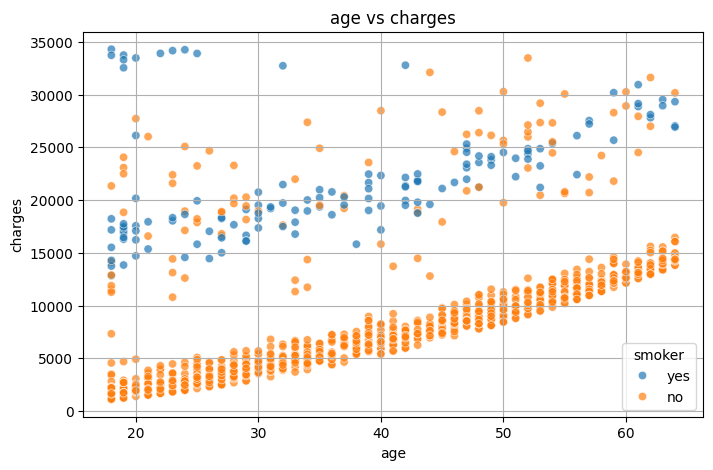

In [106]:
scatter_plot(df, 'age', 'charges')

###2D analysis of Quantitative Variable and ctegorical Variable

<ipython-input-63-cd5c905c479d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col1, y=col2, palette='pastel')


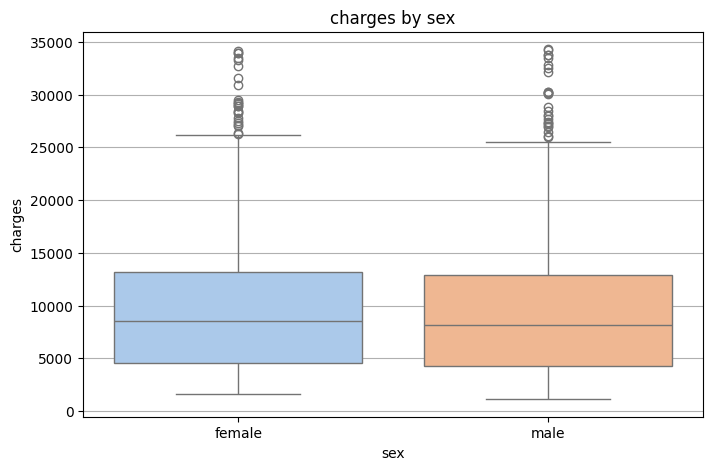

In [107]:
boxplot(df, 'sex', 'charges')

##ND Statistical Analysis

In [108]:
def joint_3d_analysis(data, quant_var, cat_var1, cat_var2):
  plt.figure(figsize=(12, 8))
  sns.boxplot(x=cat_var1, y=quant_var, hue=cat_var2, data=data, palette='pastel')
  plt.title(f'Joint 3-D Analysis: {quant_var} by {cat_var1} and {cat_var2}')
  plt.xlabel(cat_var1)
  plt.ylabel(quant_var)
  plt.grid(axis='y')
  plt.legend(title=cat_var2)
  plt.show()

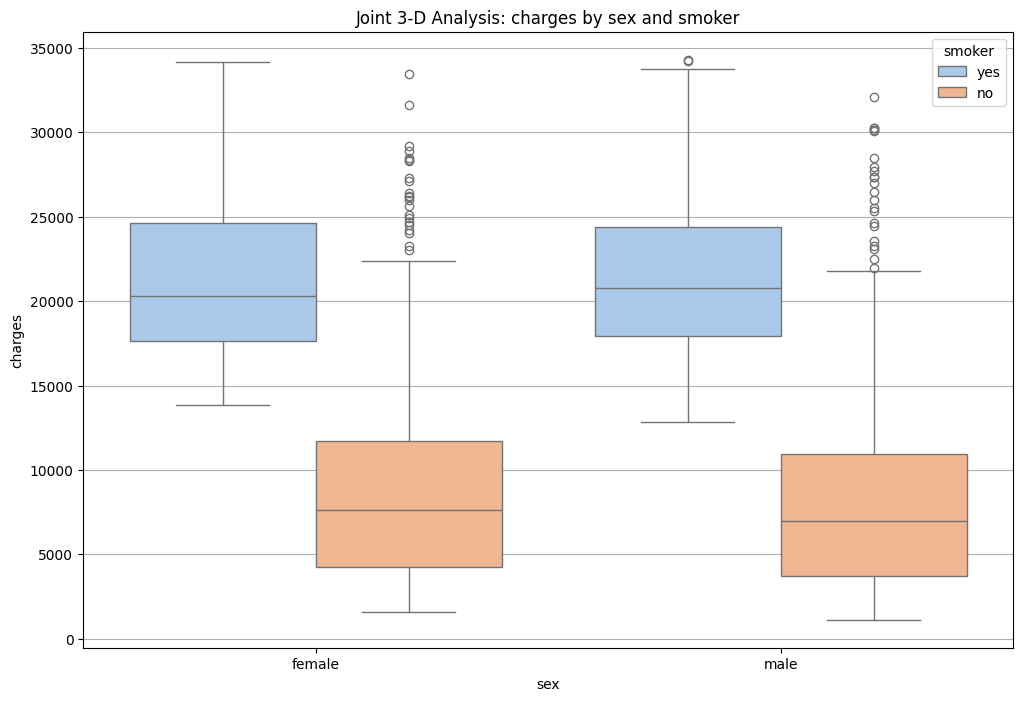

In [109]:
joint_3d_analysis(df, 'charges', 'sex', 'smoker')

In [113]:
def dispersion_box_plots_categorical(df, numerical_column, categorical_column1, categorical_column2):
  plt.figure(figsize=(12, 8))
  sns.boxplot(x=categorical_column1, y=numerical_column, hue=categorical_column2, data=df)
  plt.title(f'Box Plots of {numerical_column} by {categorical_column1} and {categorical_column2}')
  plt.xlabel(categorical_column1)
  plt.ylabel(numerical_column)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

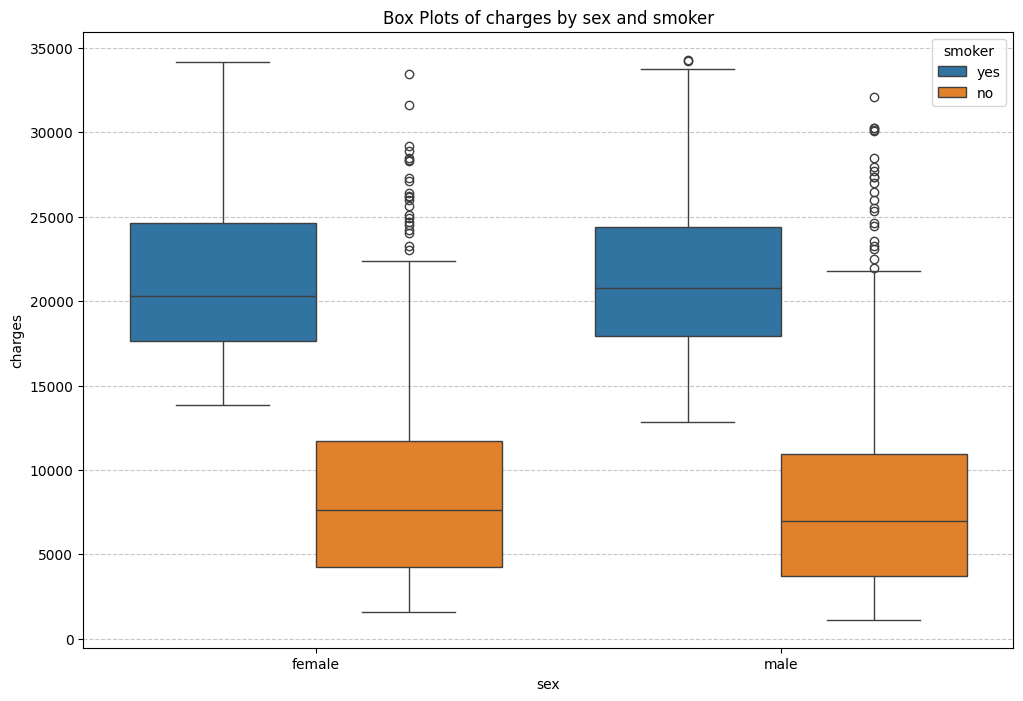

In [114]:
dispersion_box_plots_categorical(df, 'charges', 'sex', 'smoker')

###Joint 3-D Analysis of a Categorical Variable and Two Quantitative Variables

In [115]:
def joint_3d_analysis_categorical_quant(data, cat_var, quant_var1, quant_var2):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(data=data, x=quant_var1, y=quant_var2, hue=cat_var, alpha=0.7)
  plt.title(f'Joint 3-D Analysis: {cat_var} vs {quant_var1} and {quant_var2}')
  plt.xlabel(quant_var1)
  plt.ylabel(quant_var2)
  plt.grid()
  plt.show()


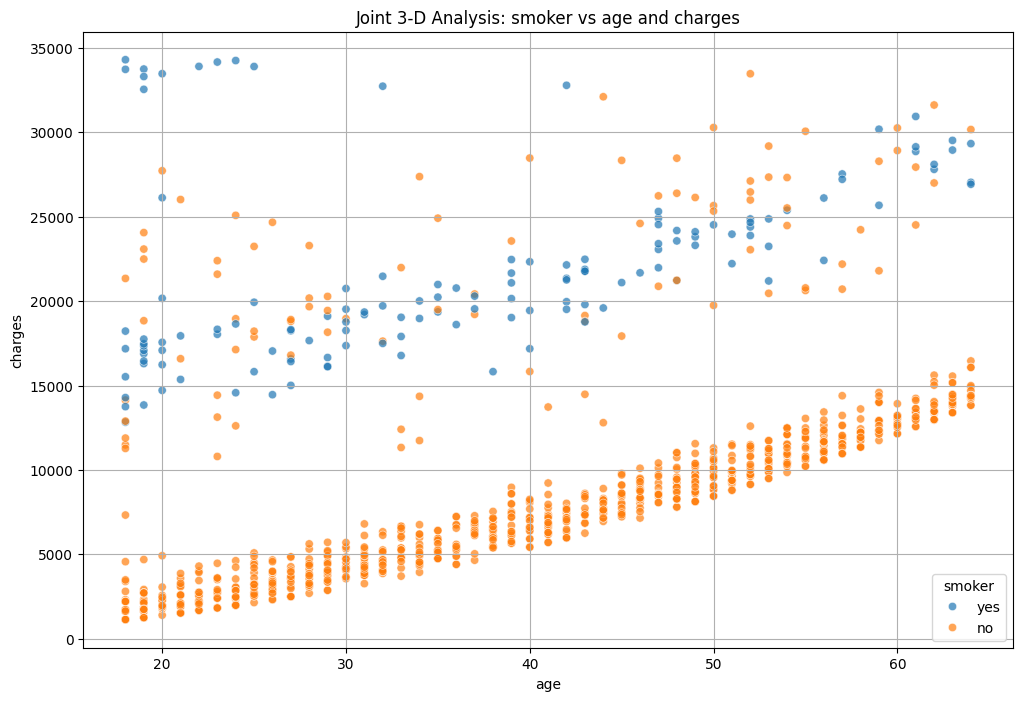

In [116]:
joint_3d_analysis_categorical_quant(df, 'smoker', 'age', 'charges')